In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
 

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.sql import func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
 
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()
print(precipitation)
            

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [11]:
df = pd.DataFrame(precipitation, columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
df.head()


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [12]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


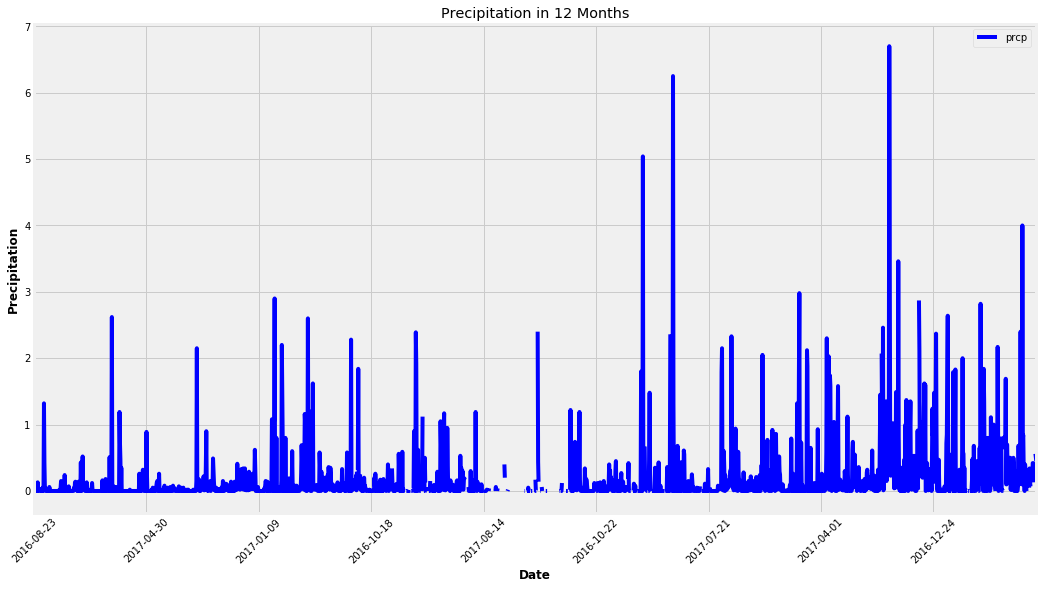

<Figure size 432x288 with 0 Axes>

In [13]:
 
prcp_plot = df.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='b')
plt.ylabel('Precipitation', weight='bold')
plt.xlabel('Date', weight='bold')
plt.title("Precipitation in 12 Months")
plt.show()
plt.savefig("Precipiatation")

In [14]:
# Design a query to calculate the total number of stations
total_stations = session.query(Measurement.station).distinct().count()
print(total_stations)


9


In [15]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order.
most_active = session.query(Measurement.station, 
                            func.count(Measurement.station)).group_by(Measurement.station).\
                            order_by(func.count(Measurement.station).desc()).all()
print(most_active)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [16]:
#most active station
top_station=most_active[0][0]
print(top_station)

USC00519281


In [17]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
temp_obs = session.query(Measurement.tobs).filter(Measurement.date.between('2016-08-23', '2017-08-23')).all()
temp_obs = pd.DataFrame(temp_obs, columns=['temperature'])
temp_obs.head()


,temperature
0,81.0
1,79.0
2,80.0
3,79.0
4,77.0


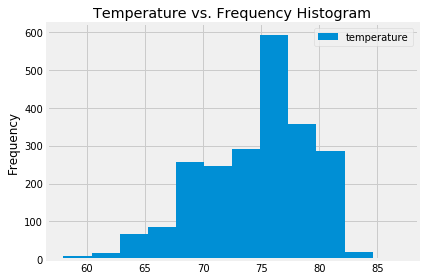

<Figure size 432x288 with 0 Axes>

In [19]:
# ax = temp_obs.hist(column="station", bins=12)
temp_obs.plot.hist(bins=12, title="Temperature vs. Frequency Histogram")
plt.tight_layout()
plt.savefig("Images/TemperaturevsFrequency.png")
plt.show()
plt.savefig("Temperature")


![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
temp_obs.describe()

![describe](Images/describe.png)

![precipitation](Images/station-histogram.png)

## Optional Challenge Assignment